# Stackoverflow Survey 2019 - Pandas ile Veri Analizi


### Soru 1:
* Stackoverflow'un 2019 yılı için geliştiricilerle yaptığı anket sonuçlarını içeren ```"survey_results_public.csv"``` adlı dosyayı okuyarak __survey_19__ adlı DataFrame'e aktarın.
* DataFrame'in satır ve sütun sayısını yazdırın.
* ```Respondent``` sütununu index olarak atayın.
* Aşağıdaki sütunları dataframe'den siliniz:

    ``` ['ScreenName', 'SOVisit1st','SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime', 'SOAccount',   'SOPartFreq', 'SOJobs', 'EntTeams', 'SOComm', 'WelcomeChange', 'SONewContent']``` 
  
  
* ```DevType``` ya da ```LanguageWorkedWith``` sütununda eksik veri olan satırları siliniz. Kaç satır silindi?
* ```Country``` sütunundaki ```Russian Federation``` ve ```Czech Republic``` değerlerini sırasıyla ```Russia``` ve ```Czechia``` olarak değiştiriniz.
* Haftalık çalışma saati ```(WorkWeekHrs)``` ya da yıllık maaş ```(ConvertedComp)``` sütunlarındaki değerleri, ilgili sütunun ortalamasının %99'undan daha uzakta veri içeren satırları siliniz.
* ```Gender``` sütununda ```Man```, ```Woman``` ve ```NaN``` dışındaki değerleri, ```Non-binary``` değeri ile değiştirin.

In [81]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

#https://www.kaggle.com/mchirico/stack-overflow-developer-survey-results-2019?select=survey_results_public.csv
survey_19=pd.read_csv(r"survey_results_public.csv")
print("Survey_19 satır sayısı :",len(survey_19),"\nSurvey_19 sütun sayısı :",len(survey_19.columns))

#"Respondent" sütununu yeni index olarak atama
survey_19.set_index("Respondent", inplace=True)

#İlgili kolonların silinmesi
survey_19.drop(['ScreenName', 'SOVisit1st','SOVisitFreq', 'SOVisitTo', 'SOFindAnswer',
                'SOTimeSaved', 'SOHowMuchTime', 'SOAccount',   'SOPartFreq', 'SOJobs', 
                'EntTeams', 'SOComm', 'WelcomeChange', 'SONewContent'], axis=1, inplace=True)

#Toplam "NaN" veri içeren satır sayısının hesaplanması
nanRow = survey_19["DevType"].isnull().sum()
#"Nan" veri içeren satırların silinmesi
survey_19['DevType'].dropna(how='all',inplace=True)
print("DevType kolonunda eksik veriler için silinen satır sayısı :",nanRow)

#"Country" kolonunda ki ilgili değerlerin değiştirilmesi
survey_19["Country"].replace({"Russian Federation": "Russia","Czech Republic": "Czechia"}, inplace=True)

#ilgili sütun ortalamalarından %99 uzak değer içeren verilerin silinmesi
survey_19.drop(survey_19[survey_19.WorkWeekHrs > survey_19.WorkWeekHrs.mean()+survey_19.WorkWeekHrs.mean()*0.99].index,
               axis=0, inplace=True)
survey_19.drop(survey_19[survey_19.WorkWeekHrs <= survey_19.WorkWeekHrs.mean()-survey_19.WorkWeekHrs.mean()*0.99].index,
               axis=0, inplace=True)

#gender sütununda ki "Man","Women" ve "NaN" değerlerinin "Non-binary" ile değiştirilmesi
change_value = ['Man', 'Woman', np.nan]
survey_19["Gender"] = survey_19["Gender"].apply(lambda x: x if x in change_value else "Non-binary")


Survey_19 satır sayısı : 88883 
Survey_19 sütun sayısı : 85
DevType kolonunda eksik veriler için silinen satır sayısı : 7548


### Soru 2:
* ```Age``` sütununu 0, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 99 binleri ile aralığa çevirerek ```AgeInterval``` adında yeni bir sütun oluşturunuz.
* Ankete katılanların yaş aralıklarına göre dağılımını pasta grafiğinde gösteriniz. 
* (19-24] yaş aralığının en çok kullandığı sosyal medya nedir?

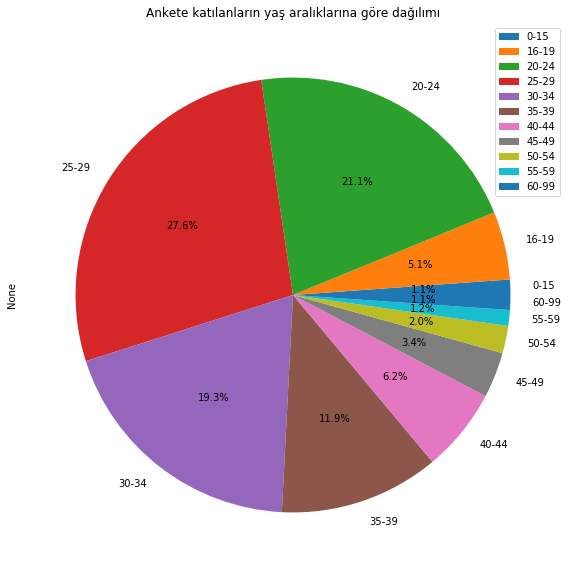

In [82]:
#Age sütununu ilgili binler ile aralığa çevirilere yeni oluşturulan "AgeInterval" sütununa atanması
survey_19['AgeInterval'] = pd.cut(x=survey_19['Age'], bins=[0, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 99],
                                  labels=['0-15', '16-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54',
                                         '55-59','60-99'], right=True)

#Yaş aralıklarının pasta grafiği ile gösterilmesi
group_AgeInterval = survey_19.groupby(['AgeInterval'], observed=True)
age_interval = group_AgeInterval.groups.keys()
age_interval = group_AgeInterval.size()

plot = age_interval.plot.pie(y=0,autopct='%1.1f%%',title="Ankete katılanların yaş aralıklarına göre dağılımı",
                    figsize=(10, 10),legend=True)


### Soru 3:
* DataFrame'i kariyer memnuniyetine ```(CareerSat)``` göre gruplayıp her bir memnuniyet grubundakilerin yıllık kazanç ```(ConvertedComp)``` ortalamasını bularak çizgi grafiği çiziniz. Çizgi grafiğinde X-ekseni en düşük memnuniyetten en yüksek memnuniyete doğru olmalıdır.

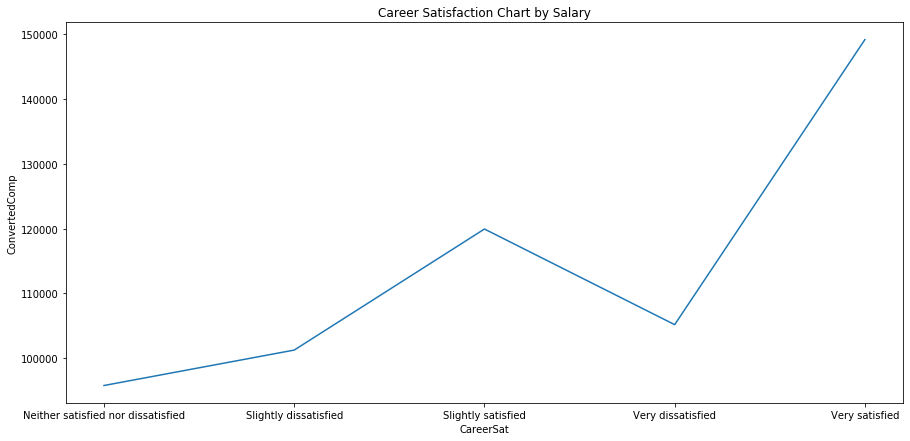

In [83]:

group_careerSet = survey_19.groupby(['CareerSat'], observed=True) #"CareerSat" sütununa göre gruplama
plt.title('Career Satisfaction Chart by Salary')                  
plt.plot(group_careerSet["ConvertedComp"].mean())                 #"ConvertedComp" değerinin ortalamasını tabloya aktarma
plt.ylabel('ConvertedComp')
plt.xlabel('CareerSat')
plt.rcParams["figure.figsize"] = (15,7)
plt.show()

### Soru 4: 
Ankete katılım sayısı bakımından ilk ve son 10 ülkeyi tek bir figürde yan yana iki ayrı alt grafik (subplot) olacak şekilde pasta grafiği ile gösteriniz.

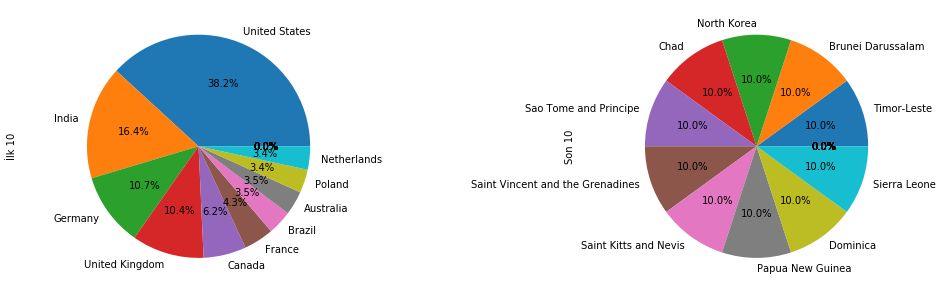

In [105]:
groupedCountry = survey_19.groupby(['Country'])
groupedCt10=groupedCountry.size().sort_values(ascending=False).head(10) #ilk 10 ülkenin seçilmesi
groupedCf10=groupedCountry.size().sort_values(ascending=False).tail(10) #son 10 ülkenin seçilmesi

pieCoutry = pd.concat([groupedCt10,groupedCf10], axis=1, keys=['İlk 10', 'Son 10'])
axes = pieCoutry.plot(kind='pie',subplots=True, autopct='%1.1f%%',legend=False)

for ax in axes:
    
    ax.set_aspect('equal')
    ax.yaxis.set_label_coords(-0.15, 0.5)

plt.subplots_adjust(wspace=1)
plt.show()

### Soru 5: 
Veri Bilimcilerin (```DevType``` sütununda ```Data scientist or machine learning specialist``` değerini içeren) en çok kullandığı dil ```(LanguageWorkedWith)``` nedir? Tüm kullandıkları dillerin yüzdelerini bulunuz ve yatay bar plot olarak gösteriniz.

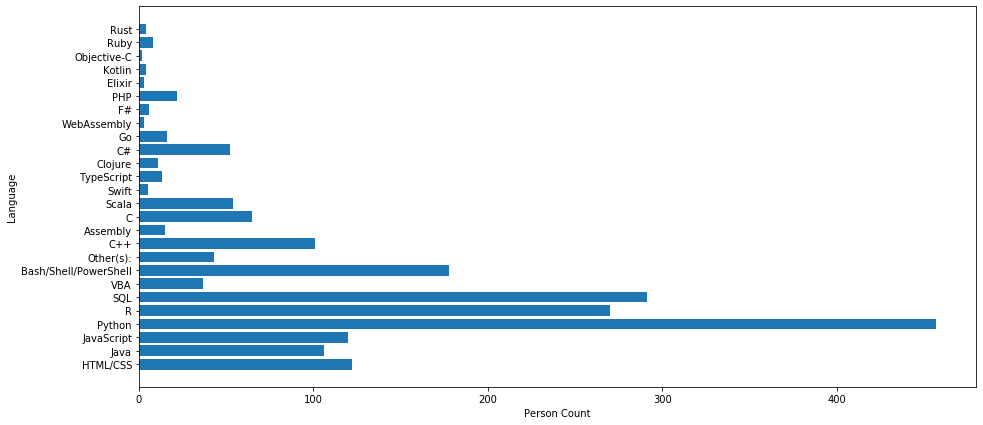

In [29]:
#DevTypeı verilen değer olanların seçilmesi
survey19_language = survey_19[survey_19['LanguageWorkedWith'].notnull()]
survey19_language = survey19_language[survey19_language['DevType'] == "Data scientist or machine learning specialist"]
unique = {}

#Verilen değere göre kullanılan dillerin tek tek seçilmesi ve sayılması
for languages in survey19_language['LanguageWorkedWith'].apply(lambda row: str(row).split(';')):
    for lang in languages:
        if lang not in unique.keys():
            unique[lang] = 1
        else:
            unique[lang] += 1

#Sonucun yata bar plot olarak ekrana yazdırılması            
plt.barh(range(len(unique)), list(unique.values()),align='center')
plt.yticks(range(len(unique)), list(unique.keys()))
plt.ylabel("Language")
plt.xlabel("Person Count")
plt.show()


### Soru 6:
* Haftalık çalışma saatlerinin ```(WorkWeekHrs)``` ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturunuz.
* Ortalamaya göre büyükten küçüğe sıralayınız. 
* Türkiye'nin kaçıncı sırada olduğunu ve haftalık çalışma saatini bulunuz.

In [14]:
#İlgili sütunlara göre verilen işlemlerin yapılıp gruplanması
countryWorkWeek = survey_19.groupby("Country")["WorkWeekHrs"].agg(["mean","std","median"])

#Sıralama işleminin yapılması ve ekrana ilk 5'in yazdırılması (Sıralama ortalama değere (mean) göre yapılmıştır)
sorting_mean=countryWorkWeek.sort_values(by=["mean"],ascending=False)
print("Ortalamaya göre büyükten küçüğe sıralama :",sorting_mean.head(20))

#Türkiye'nin sırasının tespit edilebilmesi için "Rank" sütunu oluşturulması 
sorting_mean["Rank"] = list(range(len(sorting_mean.index)))
sorting_mean["Rank"] = sorting_mean["Rank"] + 1

#Türkiye hakkındaki istatiklerin aktarılması
turkey_mean = sorting_mean.loc[sorting_mean.index == "Turkey"]

#İstenen verilerin ekrana yazdırılması
print("Türkiye'nin ortalama haftalık çalışma saatine göre sırası :",turkey_mean.loc["Turkey","Rank"])
print("Türkiye'nin haftalık çalışma saati :",turkey_mean.loc["Turkey","mean"])


Ortalamaya göre büyükten küçüğe sıralama :                                        mean        std  median
Country                                                       
Burundi                           60.000000  14.142136    60.0
Mali                              57.500000  17.677670    57.5
Turkmenistan                      52.333333  11.676187    50.0
Oman                              50.000000  10.000000    50.0
Seychelles                        50.000000        NaN    50.0
Zambia                            48.125000  13.076014    40.0
Botswana                          46.666667  15.275252    50.0
Congo, Republic of the...         46.333333   3.214550    45.0
Liechtenstein                     46.000000   5.656854    46.0
Democratic Republic of the Congo  46.000000  12.727922    46.0
Monaco                            46.000000  12.124356    39.0
Angola                            45.000000        NaN    45.0
Belize                            45.000000   7.071068    45.0
China       

### Soru 7:
Ankete katılanların ortalama haftada kaç saat kod incelediği bilgisini ```(CodeRevHrs)``` kullanarak 40 saatten az kod inceleyenler ile bir histogram (bins=20) çiziniz.


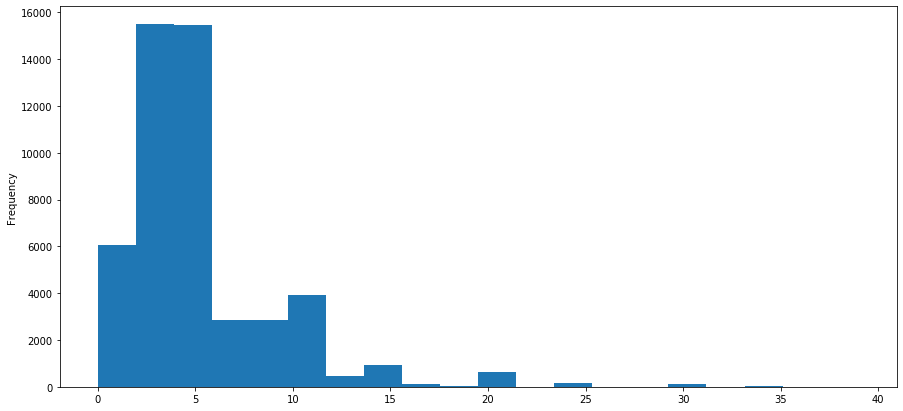

In [7]:
weekly_crh = survey_19[survey_19["CodeRevHrs"] < 40]
weekly_crh_hist = weekly_crh["CodeRevHrs"]
ax = weekly_crh_hist.plot.hist(bins=20, alpha=1)

### Soru 8:
* ```MainBranch``` sütununda bulunan değerleri aşağıdaki değerler ile değiştirin.

    ``` {'I am a student who is learning to code': 'Student',
    'I am not primarily a developer, but I write code sometimes as part of my work': 'Not a Developer',
    'I am a developer by profession':  'Developer',
    'I code primarily as a hobby':   'Code as hobby',
    'I used to be a developer by profession, but no longer am': 'Was a Developer'} 
    ```
* Ana branş ```(MainBranch)``` X-ekseninde olacak şekilde her bir branştakilerin sayısını bar plot ile gösteriniz. Her bir bar, Cinsiyet ```(Gender)``` sayısına göre yığıt (stacked) şeklinde gösterilmelidir. 
* Ana branşı ```Developer``` olan ve Türkiye'den ankete katılanların eğitim seviyelerine göre dağılımını pasta grafiği ile gösteriniz.

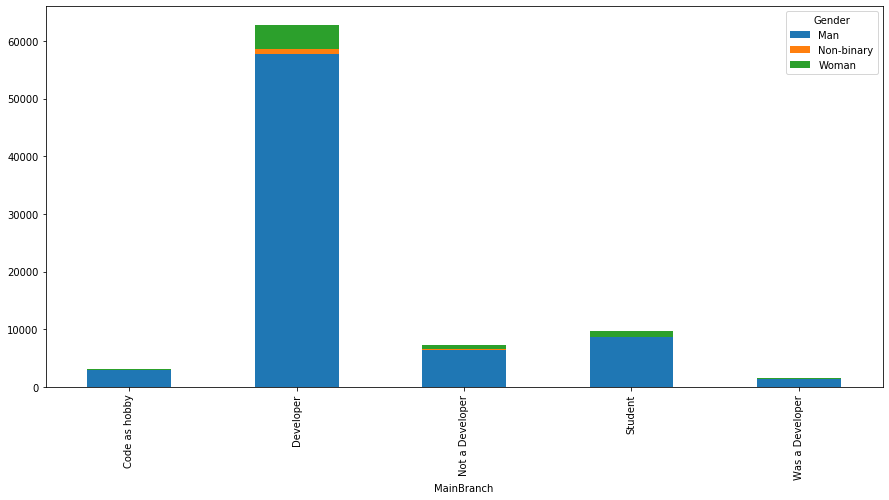

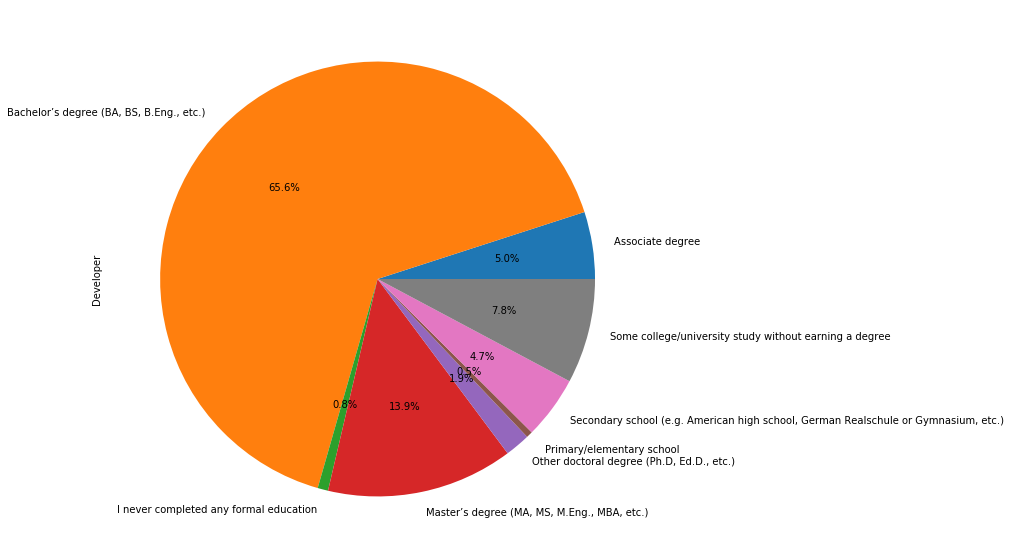

In [79]:
survey_19["MainBranch"].replace({'I am a student who is learning to code': 'Student',
  'I am not primarily a developer, but I write code sometimes as part of my work': 'Not a Developer',
  'I am a developer by profession':  'Developer',
  'I code primarily as a hobby':   'Code as hobby',
  'I used to be a developer by profession, but no longer am': 'Was a Developer'},inplace=True)

#Stacked bar plot işlemi
barChartGender = survey_19.groupby(["MainBranch","Gender"])["MainBranch"].count().unstack("Gender").fillna(0)
barChartGender.plot(kind='bar', stacked=True)

#"Turkey" sütununu aktarma
turkeyGroup = survey_19.loc[survey_19.Country == "Turkey"]

#İlgili sütunlara göre gruplama ve "Developer" derecelerini ayrıştırma
turkeyGroup_mbe = turkeyGroup.groupby(["MainBranch","EdLevel"], observed=True)["MainBranch"]
turkeyGroup_mbe = turkeyGroup_mbe.count().unstack("EdLevel")
turkeyGroup_mbe = turkeyGroup_mbe.loc[turkeyGroup_mbe.index == "Developer"]

#Pasta grafiğine doğru veri aktarmak için ilgili frame'in Transpozesini alma
turkeyGroup_mbe = turkeyGroup_mbe.T
plot = turkeyGroup_mbe.plot.pie(y = "Developer", autopct='%1.1f%%',figsize=(10,10), legend=False)

### Soru 9:
Türkiye'den ankete katılan ve TL cinsinden maaş alanların ortalama yıllık brüt maaşını bulunuz. 
* ```CurrencySymbol, CompTotal ve CompFreq``` sütunlarını kullanın.
* Her üç sütundan herhangi biri NaN olan satırları ihmal ediniz. 
* Frekansı ```(CompFreq)``` haftalık olanlar için bir yılı 50 hafta, aylık olanlar için ise 12 ay olarak düşününüz.

In [40]:
#Türkiye'den ankete katılanlar ve TL cinsinden maaş alanların tespit edilmesi
turkeyDf = survey_19.loc[survey_19.Country == "Turkey"]
turkeyDf = turkeyDf.loc[turkeyDf.CurrencySymbol == "TRY"]

#İlgili üç sütundan birinde (herhangi biri) "NaN" olan satırların ihmali için silinmesi. 
turkeyDf['CompTotal'].dropna(how='all',inplace=True)
turkeyDf['CompFreq'].dropna(how='all',inplace=True)

#Aylık ya da haftalık maaş alanların maaşının yıllık tutarının hesaplanması
turkeyDf['CompTotal'][turkeyDf.CompFreq == "Weekly"] = turkeyDf['CompTotal']*50
turkeyDf['CompTotal'][turkeyDf.CompFreq == "Monthly"] = turkeyDf['CompTotal']*12

#Yıllık üzerinden ortalama brüt maaşın ekrana yazdırılması
print("Türkiye'den ankete katılan ve TL cinsinden maaş alanların ortalama yıllık brüt maaşı :",turkeyDf['CompTotal'].mean())

Türkiye'den ankete katılan ve TL cinsinden maaş alanların ortalama yıllık brüt maaşı : 11624586.625263158


### Soru 10:
Her bir işletim sistemi ```(OpSys)``` için,  açık kaynağa katkı verme sıklıklarına ```(OpenSourcer)``` göre anketör sayılarını bar grafik ile gösteriniz.

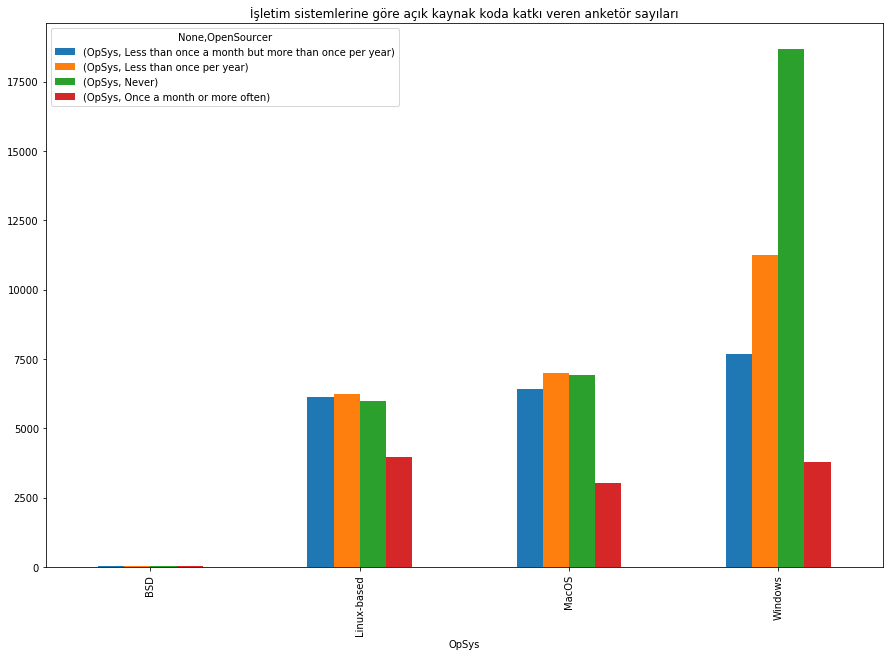

In [41]:
openSourcer_barChart = survey_19.groupby(["OpSys","OpenSourcer"])[["OpSys"]].count().unstack("OpenSourcer").fillna(0)
openSourcer_barChart.plot(kind='bar',title="İşletim sistemlerine göre açık kaynak koda katkı veren anketör sayıları"
                          ,figsize=(15,10 ),stacked=False)

### Soru 11:
* Ülkelerdeki eğitim düzeyi ```(EdLevel)``` oranlarını içeren __country_edlevels__ adında bir dataframe oluşturunuz. (Satır ülkeler, sütun eğitim düzeyleri olacak şekilde)
* Ankete en çok katılım gösteren 5 ülkeyi, her bir eğitim düzeyi oranı için karşılaştırmalı olarak gösteren bir bar plot çiziniz.

Ankete en çok katılım gösteren ilk 5 ülke ve katılım sayısı :
 Country
United States     20913
India              9010
Germany            5836
United Kingdom     5724
Canada             3384
dtype: int64


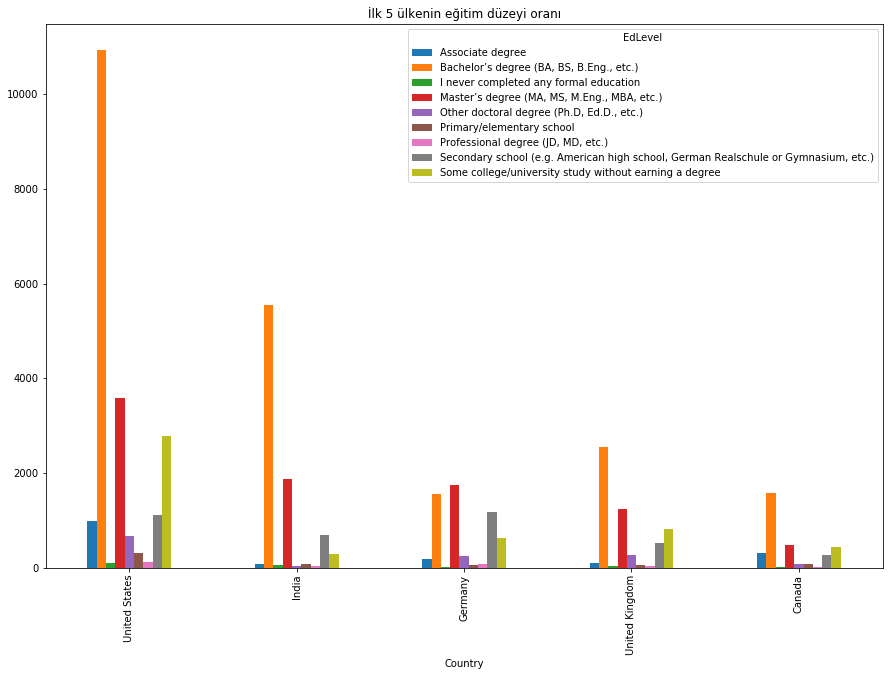

In [106]:
country_edlevels = survey_19.groupby(["Country","EdLevel"],observed=True)["Country"].count().unstack("EdLevel")
country_groups = survey_19.groupby(['Country'], observed=True)

#En çok katılım gösteren ilk 5 ülkenin belirlenmesi
firstFiveCountry = country_groups.size().sort_values(ascending=False).head(5)

#Bar plot çizimi için ilk 5 ülkenin verilerinin aktarılması
top_five_countries = country_edlevels.loc[firstFiveCountry.index]

print("Ankete en çok katılım gösteren ilk 5 ülke ve katılım sayısı :\n",firstFiveCountry)
top_five_countries.plot(kind='bar',title="İlk 5 ülkenin eğitim düzeyi oranı" ,figsize=(15,10),stacked=False)

### Soru 12:
* https://download.geonames.org/export/dump/countryInfo.txt adresindeki veriyi:
    * ilk 49 satırını ihmal ederek
    * yalnızca ```Country, Continent, CurrencyCode``` sütunlarını kullanarak 
    * ```Country``` sütununu indeks sütun olarak 
    * ```NA``` filtreleme yapmadan (```North America``` kıtasının kısaltması olan ```NA```'yı ```NaN``` değer olarak okumamak için)
  
  okuyarak __country_info__ adlı DataFrame'e aktarınız.
  
  
*     

           {AF : Africa
            AS : Asia			
            EU : Europe			
            NA : North America		
            OC : Oceania			
            SA : South America		
            AN : Antarctica	} 

   yukarıdaki haritalamayı kullanarak kıta isimlerini içeren ```ContinentName``` isimli yeni bir sütun oluşturunuz.

In [107]:
#Verilen linkteki verileri txt olarak sisteme kaydedip okunmuştur. URL adresinden direkt çekilmemiştir.
dictionary = {"AF" :"Africa",
  "AS" : "Asia",
  "EU" : "Europe", 
  "NA" : "North America",        
  "OC" : "Oceania",            
  "SA" : "South America",        
  "AN" : "Antarctica"} 

#Sisteme upload edilen txtnin okunup "\t" aracılığıyla verilerin ayrıştırılması ve sadece ilgili sütunların df'me eklenmesi
country_info = pd.read_csv("countryInfo.txt",sep="\t",skiprows=49,usecols=["Country","Continent","CurrencyCode"],na_filter=False)

#"Country"nin index olarak atanması
country_info.set_index("Country",inplace=True)

#Verilen dictionary kullanılarak replace işleminin gerçekleştirilmesi
country_info['ContinentName'] = country_info["Continent"].replace(dictionary)
country_info.head(11)

,Continent,CurrencyCode,ContinentName
Country,,,
Andorra,EU,EUR,Europe
United Arab Emirates,AS,AED,Asia
Afghanistan,AS,AFN,Asia
Antigua and Barbuda,NA,XCD,North America
Anguilla,NA,XCD,North America
Albania,EU,ALL,Europe
Armenia,AS,AMD,Asia
Angola,AF,AOA,Africa
Antarctica,AN,,Antarctica


### Soru 13:

* __survey_19__ dataframe'i ile __country_info__ dataframe'ini ülke bazında birleştirip __merged_survey__ isimli yeni bir dataframe'e aktarınız.
* Yaşadığı ülkenin resmi para biriminin dışındaki para birimiyle maaş alan kişi sayısı nedir?
* Her bir para biriminin kaç ülkede maaş olarak verildiğini azalan sırada listeleyiniz.
* Her kıtadaki ortalama maaşı en yüksek olan ülkeyi ve ortalama maaşı listeleyiniz.
* Avrupa kıtasındaki ülkelerin ortalama haftalık çalışma saati ```(WorkWeekHrs)``` ve ortalama yıllık maaşlarını ```(ConvertedComp)``` saçılım (scatter) grafiğinde gösteriniz.

Yaşadığı ülkenin resmi para biriminin dışındaki para birimiyle maaş alan kişi sayısı : 19840
Her bir para biriminin kaç ülkede maaş olarak verildiğinin azalan sırada listesi :                 Country
CurrencySymbol         
USD                 114
EUR                  82
GBP                  39
AED                  32
AUD                  25
INR                  18
AMD                  16
CHF                  14
CAD                  12
ANG                  12
AOA                  12
ALL                  11
AFN                   9
ARS                   8
SAR                   7
PLN                   7
SEK                   7
XOF                   7
ZAR                   6
SGD                   6


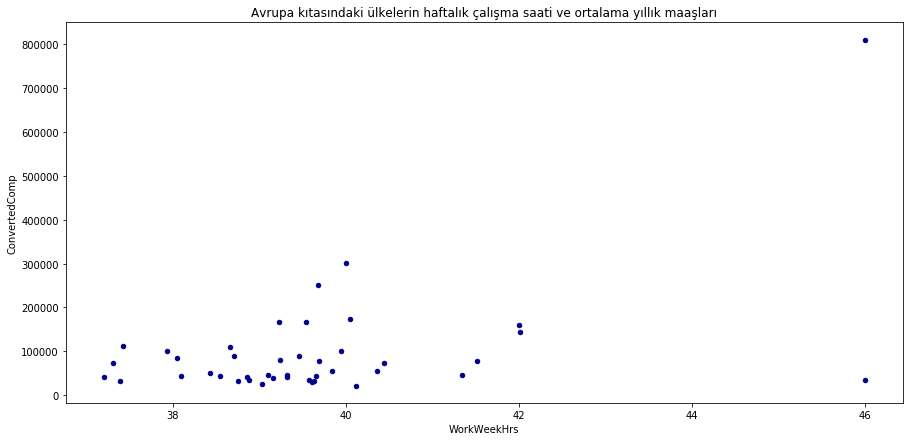

In [78]:
merged_survey = survey_19.merge(country_info, left_on="Country",right_on="Country")
currency_symbol = merged_survey.loc[merged_survey.CurrencyCode != merged_survey.CurrencySymbol]
print("Yaşadığı ülkenin resmi para biriminin dışındaki para birimiyle maaş alan kişi sayısı :",len(currency_symbol))
symbolToCountry = merged_survey.groupby("CurrencySymbol")["Country"].nunique().sort_values(ascending=False).to_frame()
#symbolToCountry["Rank"] = list(range(1,len(symbolToCountry.index)+1))
print("Her bir para biriminin kaç ülkede maaş olarak verildiğinin azalan sırada listesi :",symbolToCountry.head(20))
merged_continent = merged_survey.loc[merged_survey.ContinentName == "Europe"]
merged_continent = merged_continent.groupby("Country")[["WorkWeekHrs","ConvertedComp"]].agg("mean")
ax1 = merged_continent.plot.scatter(x='WorkWeekHrs',
                      y='ConvertedComp',
                      c = "DarkBlue",
                      title="Avrupa kıtasındaki ülkelerin haftalık çalışma saati ve ortalama yıllık maaşları")